# K |Means

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('baseball.csv')
print(df)

# clusters is an array where each element is an array; the first element is the cluster number, while the second is the cluster itself

def euclid(x, clusters):
    c, dis = clusters[0], np.sum((x - clusters[0][1]) ** 2) ** 0.5
    for i in clusters[1: ]:
        val = np.sum((x - i[1]) ** 2) ** 0.5
        if dis > val:
            dis = val
            c = i
    return c



    Points  Assists  Rebounds
0     18.0      3.0        15
1     19.0      4.0        14
2     14.0      5.0        10
3     14.0      4.0         8
4     11.0      7.0        14
5     20.0      8.0        13
6     28.0      7.0         9
7     30.0      6.0         5
8     31.0      9.0         4
9     35.0     12.0        11
10    33.0     14.0         6
11    25.0      9.0         5
12    25.0      4.0         3
13    27.0      3.0         8
14    29.0      4.0        12
15    30.0     12.0         7
16    19.0     15.0         6
17    23.0     11.0         5


In [2]:
def kmeans(k):
    clusters = [[i, df.iloc[i].to_numpy()] for i in range(k)]
    ans = [df.iloc[i].to_numpy() for i in range(k)]
    while True:
        store = [[] for i in range(k)]
        
        for i in range(len(df)):
            vector = df.iloc[i].to_numpy()
            store[euclid(vector, clusters)[0]].append(vector)
        for i in range(k):
            store[i] = np.mean(store[i], axis= 0)
        if np.array_equal(np.array(ans), np.array(store)):
            print(ans, store)
            return ans
        else:
            ans = store
            clusters = [[i, store[i]] for i in range(k)]

[array([16.        ,  5.16666667, 12.33333333]), array([27.91666667,  8.83333333,  6.75      ])] [array([16.        ,  5.16666667, 12.33333333]), array([27.91666667,  8.83333333,  6.75      ])]


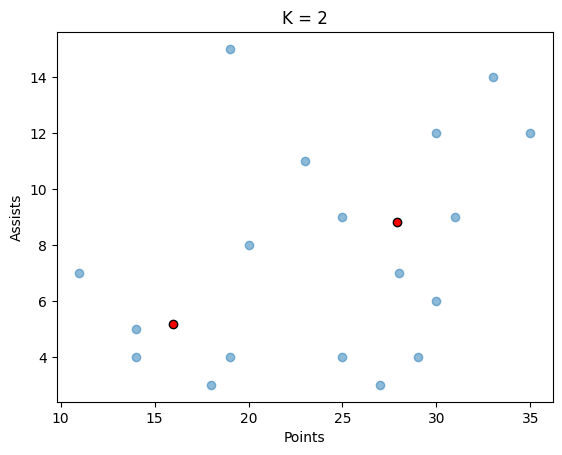

[array([19.,  5., 14.]), array([28.72727273,  8.27272727,  6.81818182]), array([14.5 ,  7.75,  9.5 ])] [array([19.,  5., 14.]), array([28.72727273,  8.27272727,  6.81818182]), array([14.5 ,  7.75,  9.5 ])]


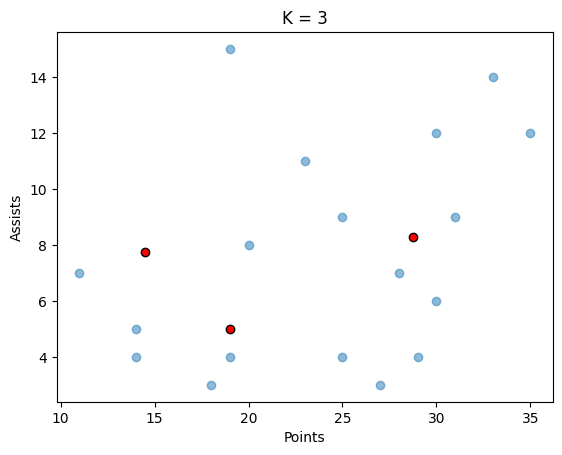

[array([19.,  5., 14.]), array([30.375,  8.375,  7.75 ]), array([13.        ,  5.33333333, 10.66666667]), array([23.  ,  9.75,  4.75])] [array([19.,  5., 14.]), array([30.375,  8.375,  7.75 ]), array([13.        ,  5.33333333, 10.66666667]), array([23.  ,  9.75,  4.75])]


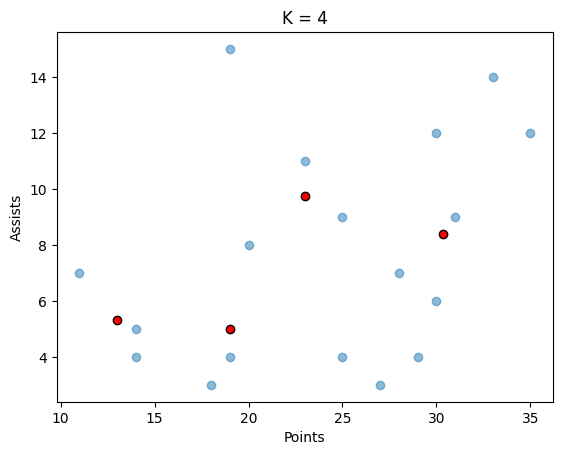

In [5]:
for k in range(2, 5):
    
    centers = kmeans(k)
    x, y = [], []
    
    for center in centers:
        x.append(center[0])
        y.append(center[1])
        
    fig = plt.figure()
    plt.title(f"K = {k}")
    plt.scatter(df['Points'].to_numpy(), df['Assists'].to_numpy(), alpha=0.5)
    plt.scatter(x, y, color='red', edgecolor='black') 
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.show()